In [1]:
from keras.preprocessing.text import Tokenizer
import codecs
from keras.preprocessing.sequence import pad_sequences
import numpy as np
import nltk
from konlpy.tag import Okt
from tqdm import tqdm

# train set
name = "1"
filename1 = './new_data/definition'+name+'_spynorth_scaling_trust.txt'
filename2 = './new_data/definition'+name+'_spynorth_scaling_untrust.txt'
filename3 = './new_data/definition'+name+'_intistranger_scaling_trust.txt'
filename4 = './new_data/definition'+name+'_intistranger_scaling_untrust.txt'
filename5 = './new_data/definition'+name+'_assassin_scaling_trust.txt'
filename6 = './new_data/definition'+name+'_assassin_scaling_untrust.txt'
filename7 = './new_data/definition'+name+'_1987_scaling_trust.txt'
filename8 = './new_data/definition'+name+'_1987_scaling_untrust.txt'
filename9 = './new_data/definition'+name+'_taxi_scaling_trust.txt'
filename10 = './new_data/definition'+name+'_taxi_scaling_untrust.txt'


with codecs.open(filename1, 'r', encoding='utf-8') as f:
    lines1 = f.readlines()
with codecs.open(filename2, 'r', encoding='utf-8') as f:
    lines2 = f.readlines()





# test set


with codecs.open('./new_data/definition'+name+'_spynorth_test_t.txt', 'r', 'utf-8') as f:
    test1 = f.readlines()
with codecs.open('./new_data/definition'+name+'_spynorth_test_ut.txt', 'r', 'utf-8') as f:
    test2 = f.readlines()
with codecs.open('./new_data/definition'+name+'_intistranger_test_t.txt', 'r', encoding='utf-8') as f:
    test3 = f.readlines()

lines_t = lines1
lines_ut = lines2
test_t = test1
test_ut = test2

lines_ = []
test_lines_ = []
for line in lines_t:
    lines_.append(line.strip())

for line in lines_ut:
    lines_.append(line.strip())

for line in test_t:
    test_lines_.append(line.strip()) # trust
for line in test_ut:
    test_lines_.append(line.strip()) # untrust

train_labels = [] # train 데이터 label
test_labels = [] # test 데이터 label
for i in range(len(lines_t)):
    train_labels.append(0)
for j in range(len(lines_ut)):
    train_labels.append(1)
for i in range(len(test_t)):
    test_labels.append(0)
for j in range(len(test_ut)):
    test_labels.append(1)
    
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

okt = Okt()
x_train = []
x_test = []
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

for sentence in tqdm(lines_):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    x_train.append(stopwords_removed_sentence)

for sentence in tqdm(test_lines_):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    x_test.append(stopwords_removed_sentence)

maxlen = 100  # 100개 단어 이후는 버립니다
training_samples = 200  # 훈련 샘플은 200 -> 200개입니다
validation_samples = 10000  # 검증 샘플은 10,000개입니다
max_words = 10000  # 데이터셋에서 가장 빈도 높은 10,000개의 단어만 사용합니다
# train 토큰화
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)
sequences = tokenizer.texts_to_sequences(x_train)

word_index = tokenizer.word_index
train = pad_sequences(sequences)

# test 토큰화
tokenizer2 = Tokenizer(num_words=max_words)
tokenizer2.fit_on_texts(x_test)
sequences2 = tokenizer2.texts_to_sequences(x_test)

word_index2 = tokenizer2.word_index
test = pad_sequences(sequences2)

train_labels = np.asarray(train_labels)
test_labels = np.asarray(test_labels)


    
print('리뷰의 최대 길이 :',max(len(review) for review in x_train))
print('리뷰의 평균 길이 :',sum(map(len, x_train))/len(x_train))
plt.hist([len(review) for review in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()


100%|██████████████████████████████████████████████████████████████████████████████| 1600/1600 [02:12<00:00, 12.05it/s]


리뷰의 최대 길이 : 120436
리뷰의 평균 길이 : 773.285


NameError: name 'plt' is not defined

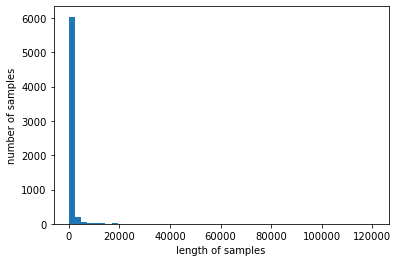

In [2]:
import matplotlib.pyplot as plt
plt.hist([len(review) for review in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [4]:
li = [len(review) for review in x_train]
li.sort(reverse=True)
print(li)

[120436, 66919, 59091, 53268, 46575, 44054, 42354, 41239, 37733, 36213, 35397, 35005, 33406, 31208, 31070, 29365, 28256, 27939, 27387, 27027, 26242, 25042, 24931, 24759, 24420, 24212, 24165, 22977, 22964, 22758, 21629, 20747, 20702, 20328, 20252, 19192, 19032, 19022, 19013, 18718, 18626, 18608, 17652, 17473, 17338, 16801, 16579, 15686, 15194, 14767, 14308, 13951, 13914, 13914, 13877, 13604, 13305, 12705, 12647, 12504, 12454, 12403, 12045, 12014, 11969, 11968, 11823, 11378, 11255, 11042, 10992, 10978, 10899, 10851, 10365, 10358, 10209, 10172, 10098, 10068, 10025, 9916, 9583, 9349, 9347, 9123, 9104, 9086, 9043, 9040, 9028, 8852, 8758, 8603, 8594, 8580, 8350, 8320, 8309, 8219, 8171, 8158, 7945, 7888, 7844, 7843, 7637, 7556, 7519, 7446, 7425, 7324, 7281, 7249, 7233, 7230, 7199, 7198, 7115, 6985, 6907, 6860, 6814, 6681, 6653, 6638, 6630, 6599, 6550, 6505, 6457, 6450, 6361, 6271, 6263, 6214, 6175, 6147, 6070, 6047, 5976, 5962, 5878, 5866, 5704, 5690, 5606, 5518, 5515, 5449, 5448, 5362, 5356,

리뷰의 최대 길이 : 53268
리뷰의 평균 길이 : 640.85375


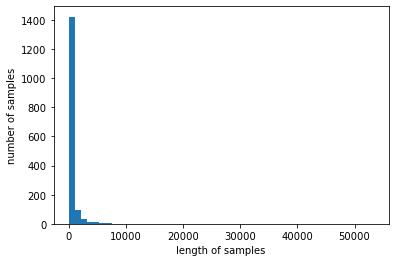

In [5]:
print('리뷰의 최대 길이 :',max(len(review) for review in x_test))
print('리뷰의 평균 길이 :',sum(map(len, x_test))/len(x_test))
plt.hist([len(review) for review in x_test], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [6]:
li = [len(review) for review in x_test]
li.sort(reverse=True)
print(li)

[53268, 35005, 30607, 28256, 22977, 20747, 20252, 18235, 17798, 16342, 13914, 12647, 12508, 10978, 10606, 9320, 7711, 7249, 6985, 6814, 6586, 6457, 6450, 6263, 5962, 5391, 5308, 5104, 4801, 4761, 4730, 4697, 4585, 4583, 4399, 4165, 3947, 3804, 3797, 3783, 3768, 3402, 3391, 3315, 3306, 3252, 3242, 3191, 3168, 3126, 3114, 3049, 2987, 2979, 2979, 2947, 2871, 2845, 2714, 2701, 2697, 2645, 2619, 2592, 2521, 2479, 2467, 2460, 2442, 2425, 2408, 2356, 2346, 2343, 2325, 2313, 2295, 2291, 2277, 2270, 2186, 2122, 2114, 2109, 2105, 2095, 2082, 2075, 2072, 2051, 2026, 2016, 1991, 1991, 1985, 1980, 1962, 1960, 1915, 1894, 1887, 1881, 1874, 1807, 1802, 1749, 1742, 1726, 1683, 1679, 1641, 1639, 1636, 1635, 1626, 1626, 1617, 1600, 1599, 1597, 1591, 1586, 1567, 1566, 1549, 1530, 1525, 1520, 1519, 1514, 1482, 1456, 1454, 1449, 1413, 1403, 1383, 1376, 1371, 1339, 1330, 1327, 1323, 1308, 1293, 1281, 1278, 1277, 1267, 1258, 1253, 1238, 1238, 1237, 1230, 1229, 1223, 1219, 1216, 1209, 1204, 1203, 1202, 1195, 